## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import sklearn.metrics
from sklearn.preprocessing import StandardScaler
# To import the scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer

# To support plots
import matplotlib.pyplot as plt

# Spliting the dataset into training and testing set

from sklearn.model_selection import train_test_split
from sklearn import metrics

## Load the data in the dataframe

In [25]:
df = pd.read_excel('labeldata.xlsx')
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
0,0.0,1,2,8.0,1,0,0,0.0,3,0,...,1027549,31,0,0,126,1.203939,4.81,7.25,10.02,0
1,1.0,12,0,2.0,0,0,0,0.0,3,3,...,400531,19,0,0,6,3.375939,3.61,6.58,4.98,0
2,0.0,0,0,3.0,2,0,1,0.0,0,3,...,608589,41,24153,0,126,2.972357,4.18,12.56,7.82,1
3,0.0,3,2,2.0,1,0,0,0.0,1,0,...,522208,28,0,0,63,2.506175,6.17,7.90,7.91,0
4,1.0,6,2,4.0,3,0,1,0.0,1,3,...,442829,35,0,0,110,1.121894,4.51,8.20,7.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,3,2,1.0,3,0,1,0.0,0,0,...,622026,28,0,0,126,2.003571,4.59,7.98,6.75,0
9996,0.0,1,4,8.0,5,0,0,0.0,2,2,...,381270,31,0,7094,119,1.117232,4.68,6.31,7.57,1
9997,4.0,3,0,12.0,2,0,1,0.0,0,2,...,509525,28,0,0,126,2.887609,3.64,11.37,6.85,1
9998,5.0,1,2,4.0,3,0,1,0.0,0,1,...,787933,31,0,0,126,2.765637,3.07,9.86,7.39,0


## Data Cleaning

In [26]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
count,9422.000000,10000.000000,10000.000000,9419.000000,10000.000000,10000.000000,10000.000000,9826.000000,10000.000000,10000.000000,...,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.697410,3.412700,1.081200,4.698163,2.397200,0.447300,0.675200,1.551089,1.501400,1.988700,...,5.930538e+05,31.554800,3267.275700,283.497800,127.355400,2.014869,5.009280,10.032794,7.988933,0.242000
std,1.424695,3.462568,1.191028,2.977955,1.235227,1.193216,0.468323,5.666839,1.123087,1.420273,...,3.342775e+05,8.143539,23103.082676,1281.899531,38.787892,0.991098,0.990554,2.000036,1.603187,0.428316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.325700e+04,3.000000,0.000000,0.000000,3.000000,-1.884801,1.450000,2.900000,2.360000,0.000000
25%,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,3.653175e+05,28.000000,0.000000,0.000000,126.000000,1.345720,4.340000,8.690000,6.910000,0.000000
50%,0.000000,3.000000,1.000000,4.000000,2.000000,0.000000,1.000000,0.000000,2.000000,2.000000,...,5.570185e+05,31.000000,0.000000,0.000000,126.000000,2.014534,5.010000,10.040000,7.980000,0.000000
75%,1.000000,4.000000,2.000000,7.000000,3.000000,0.000000,1.000000,0.000000,3.000000,3.000000,...,7.416855e+05,38.000000,0.000000,0.000000,141.000000,2.695249,5.680000,11.390000,9.070000,0.000000
max,7.000000,15.000000,6.000000,12.000000,5.000000,4.000000,1.000000,40.000000,3.000000,4.000000,...,4.291793e+06,50.000000,314156.000000,12252.000000,311.000000,5.664434,8.900000,18.460000,13.820000,1.000000


In [27]:
df.isnull().sum() # check for null values

x1     578
x2       0
x3       0
x4     581
x5       0
x6       0
x7       0
x8     174
x9       0
x10      0
x11      0
x12      0
x13      0
x14      0
x15      0
x16      0
x17      0
x18      0
x19      0
x20      0
x21      0
x22      0
y        0
dtype: int64

In [28]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [29]:
df.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
y      0
dtype: int64

In [30]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.657100,3.412700,1.081200,4.483300,2.397200,0.447300,0.675200,1.524100,1.501400,1.988700,...,5.930538e+05,31.554800,3267.275700,283.497800,127.355400,2.014869,5.009280,10.032794,7.988933,0.242000
std,1.392449,3.462568,1.191028,3.016858,1.235227,1.193216,0.468323,5.620977,1.123087,1.420273,...,3.342775e+05,8.143539,23103.082676,1281.899531,38.787892,0.991098,0.990554,2.000036,1.603187,0.428316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.325700e+04,3.000000,0.000000,0.000000,3.000000,-1.884801,1.450000,2.900000,2.360000,0.000000
25%,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,3.653175e+05,28.000000,0.000000,0.000000,126.000000,1.345720,4.340000,8.690000,6.910000,0.000000
50%,0.000000,3.000000,1.000000,4.000000,2.000000,0.000000,1.000000,0.000000,2.000000,2.000000,...,5.570185e+05,31.000000,0.000000,0.000000,126.000000,2.014534,5.010000,10.040000,7.980000,0.000000
75%,0.000000,4.000000,2.000000,7.000000,3.000000,0.000000,1.000000,0.000000,3.000000,3.000000,...,7.416855e+05,38.000000,0.000000,0.000000,141.000000,2.695249,5.680000,11.390000,9.070000,0.000000
max,7.000000,15.000000,6.000000,12.000000,5.000000,4.000000,1.000000,40.000000,3.000000,4.000000,...,4.291793e+06,50.000000,314156.000000,12252.000000,311.000000,5.664434,8.900000,18.460000,13.820000,1.000000


In [35]:
X = df.iloc[:,:22]
y = df.iloc[:,-1]

X = X.values
y = y.values
class_0 = (y == 0).sum()
class_1 = (y== 1).sum()
print(class_0)
print(class_1)

7580
2420


## Sampling 

In [36]:

from sklearn.utils import resample

# Separate majority and minority classes
df_class0 = df[y == 0]
df_class1 = df[y == 1]
 
# Upsample minority class
df_class1_upsampled = resample(df_class1, 
                                 replace=True,     # sample with replacement
                                 n_samples=7580,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
Y = pd.concat([df_class0, df_class1_upsampled])
 
# Display new class counts
Y

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
0,0.0,1,2,8.0,1,0,0,0.0,3,0,...,1027549,31,0,0,126,1.203939,4.81,7.25,10.02,0
1,1.0,12,0,2.0,0,0,0,0.0,3,3,...,400531,19,0,0,6,3.375939,3.61,6.58,4.98,0
3,0.0,3,2,2.0,1,0,0,0.0,1,0,...,522208,28,0,0,63,2.506175,6.17,7.90,7.91,0
5,0.0,0,4,2.0,3,0,1,0.0,3,2,...,421382,41,0,0,38,1.879496,5.57,12.39,9.98,0
6,0.0,3,0,9.0,2,0,1,0.0,1,4,...,293918,28,0,0,126,3.307213,5.58,10.90,9.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7966,0.0,6,0,4.0,2,0,1,0.0,2,3,...,590139,35,0,0,157,3.532606,5.02,10.41,8.64,1
9077,0.0,5,2,3.0,3,0,1,0.0,3,3,...,521058,38,0,0,251,2.407662,5.66,6.92,8.77,1
4294,5.0,1,0,8.0,0,1,0,0.0,1,0,...,257149,31,0,0,126,3.955949,5.45,11.52,9.82,1
6752,2.0,3,0,4.0,2,0,1,0.0,1,0,...,303038,28,24153,0,188,1.852949,4.68,6.59,7.34,1


## Split the Data

In [37]:
X = Y.iloc[:,:22]
y = Y.iloc[:,-1]
print(y.shape)
X.shape

(15160,)


(15160, 22)

#### Checking the total no. of values for each class

In [11]:

X = X.values
y = y.values
class_0 = (y == 0).sum()
class_1 = (y== 1).sum()
print(class_0)
print(class_1)

7580
7580


## Split the data into Train and Test 

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state=200)

## Feature Scalling

In [39]:
# feature scalling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Comparing the ML algorithms

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
seed = 3456
models = []
models.append(('LR', LogisticRegression()))
models.append(('MLP', MLPClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.384301 (0.185083)
MLP: 0.549802 (0.444423)
KNN: 0.684828 (0.102495)
CART: 0.908377 (0.061408)
NB: 0.619657 (0.323399)
RF: 0.927968 (0.041142)
SVM: 0.083179 (0.065336)


#### As random forest has the highest accuracy among all the algorithms, I would go ahead with the random forest 

## Training 

Traning
Accuracy:
0.9360158311345647
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       789
           1       0.90      0.97      0.94       727

    accuracy                           0.94      1516
   macro avg       0.94      0.94      0.94      1516
weighted avg       0.94      0.94      0.94      1516

confusion matrix:
[[713  76]
 [ 21 706]]
ROC:


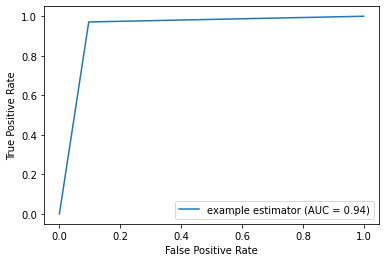

Balanced error rate 
0.06260514676527146


In [42]:

model1 = RandomForestClassifier(n_estimators=10, random_state = 23458)
model1.fit(X_train, y_train)

y_hat = model1.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Traning")

print('Accuracy:')
print(accuracy_score(y_test, y_hat))

print('Classification report:')
print(classification_report(y_test, y_hat))

print('confusion matrix:')
cm = confusion_matrix(y_test, y_hat)
print(cm)

print('ROC:')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()  
plt.show()   

print("Balanced error rate ")
tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
sum = (fn/ (tp+fn)) + (fp / (fp+tn))
BER = sum / 2
print(BER)

## Cross-validation 

Model evaluation (CV)
Accuracy:
0.9341029023746702
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      7580
           1       0.91      0.97      0.94      7580

    accuracy                           0.93     15160
   macro avg       0.94      0.93      0.93     15160
weighted avg       0.94      0.93      0.93     15160

Predicted   0.0   1.0
Actual               
0          6816   764
1           235  7345


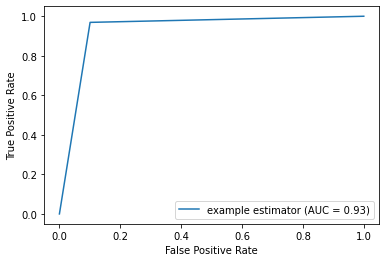

Balanced error rate 
0.06589709762532982


In [20]:

X = X.values
y = y.values

y_prob = np.zeros(y.shape)
y_hat = np.zeros(y.shape)
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5625)
# Cross-validation
for train, test in kfold.split(X, y):
   
    sc.fit(X[train])
    # sc.fit(X[test])
    X_train = sc.transform(X[train])
    X_test = sc.transform(X[test])
    model2 =  RandomForestClassifier(n_estimators=100, random_state = 1223)
    model2.fit(X_train, y[train])
    y_prob[test] = model2.predict_proba(X_test)[:, 1]
    y_hat[test] = model2.predict(X_test)
print('Model evaluation (CV)')
print('Accuracy:')
print(metrics.accuracy_score(y, y_hat))
print('Classification report:')
print(metrics.classification_report(y, y_hat))
cm = pd.crosstab(y, y_hat, rownames=['Actual'], colnames=['Predicted'])
print (cm)

fpr, tpr, thresholds = metrics.roc_curve(y, y_hat)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()  
plt.show()   

print("Balanced error rate ")
tn, fp, fn, tp = confusion_matrix(y, y_hat).ravel()
sum = (fn/ (tp+fn)) + (fp / (fp+tn))
BER = sum / 2
print(BER)

## Hyperparameters

Grid Search for Hyperparameters
Optimal 
Optimal parameters:
Optimal parameters: {'n_estimators': 41, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 38, 'bootstrap': False}
Model evaluation (Optimal Hyperparameters)
Accuracy:
0.9403034300791556
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1507
           1       0.91      0.97      0.94      1525

    accuracy                           0.94      3032
   macro avg       0.94      0.94      0.94      3032
weighted avg       0.94      0.94      0.94      3032

[[1366  141]
 [  40 1485]]


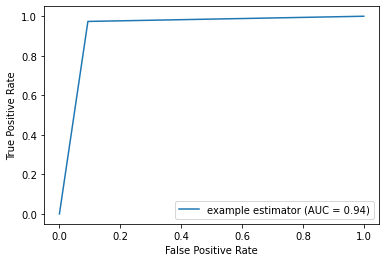

Balanced error rate 
0.05989643956617752


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
print('Grid Search for Hyperparameters')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=526)

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
# Here we should use specific classifier, because of the parameters
print('Optimal ')

rf = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 120, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 15)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 9]
# Method of selecting samples for training each tree
bootstrap = [True, False]

distributions = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
model3 = model_selection.RandomizedSearchCV(rf, distributions, random_state=0)

print('Optimal parameters:')
model3.fit(X_train, y_train)
print('Optimal parameters:', model3.best_params_)
y_test_hat = model3.predict(X_test)
y_test_prob = model3.predict_proba(X_test)[:, 1]
print('Model evaluation (Optimal Hyperparameters)')
print('Accuracy:')
print(metrics.accuracy_score(y_test, y_test_hat))
print('Classification report:')
print(metrics.classification_report(y_test, y_test_hat))

cm = confusion_matrix(y_test, y_test_hat)
print(cm)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_hat)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()  
plt.show()   

print("Balanced error rate ")
tn, fp, fn, tp = confusion_matrix(y_test, y_test_hat).ravel()
sum = (fn/ (tp+fn)) + (fp / (fp+tn))
BER = sum / 2
print(BER)

## Converting results to CSV file

In [46]:
unlabel_data =  pd.read_excel('unlabeled_data.xlsx')
unlabel_data = unlabel_data.iloc[:,0:23]
for column in unlabel_data.columns:
    unlabel_data[column].fillna(unlabel_data[column].mode()[0], inplace=True)
instance = unlabel_data.iloc[:,0]
unlabel_data = unlabel_data.iloc[:,1:23]
unlabel_data
#print(instance)
y_test = unlabel_data.values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y_test = sc.fit_transform(y_test)
yhat = model3.predict(y_test)

class_0 = (yhat == 0).sum()
class_1 = (yhat == 1).sum()
print(class_0)
print(class_1)

submission = pd.DataFrame()
submission['instance'] = instance
submission['label'] = yhat
submission.to_csv('BMI555IEE520Results2020AshwiniRagit.csv', encoding='utf-8', index = False)


3611
1389
